# Example: Graph generation from a gene

This notebook will show you how to use the tool to generate a KG on the underlying data.

In [1]:
new_path = "E:\BioDataFuse\pyBiodatafuse"

import os

os.chdir(new_path)

# Set the current working directory
current_dir = os.getcwd()
print("Current directory:", current_dir)

Current directory: E:\BioDataFuse\pyBiodatafuse


In [2]:
# Import modules
import pickle

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

from pyBiodatafuse import id_mapper
from pyBiodatafuse.annotators import (
    bgee,
    disgenet,
    minerva,
    molmedb,
    opentargets,
    pubchem,
    stringdb,
    wikipathways,
)
from pyBiodatafuse.graph import generator
from pyBiodatafuse.utils import combine_sources

### Load the input list and convert it to a dataframe

In [3]:
genes_of_interest = """AAGRN
ALG14
ALG2
CHAT
CHD8
CHRNA1
CHRNB1
CHRND
CHRNE
CHRNG
COL13A1
COLQ
DOK7
DPAGT1
GFPT1
GMPPB
LAMA5
LAMB2
LRP4
MUSK
MYO9A
PLEC
PREPL
PURA
RAPSN
RPH3A
SCN4A
SLC18A3
SLC25A1
SLC5A7
SNAP25
SYT2
TOR1AIP1
UNC13A
VAMP1"""
# genes_of_interest = """
# DMD
# HOXA10"""
# genes_of_interest = "DMD"
gene_list = genes_of_interest.split("\n")
len(gene_list)

35

In [4]:
data_input = pd.DataFrame(gene_list, columns=["identifier"])
data_input.head()

identifier
0      AAGRN
1      ALG14
2       ALG2
3       CHAT
4       CHD8

### Entity resolution using BridgeDB

In [5]:
bridgdb_df, bridgdb_metadata = id_mapper.bridgedb_xref(
    identifiers=data_input,
    input_species="Human",
    input_datasource="HGNC",
    output_datasource="All",
)
bridgdb_df.head()

identifier identifier.source      target   target.source
0      AAGRN              HGNC                         NaN
1      ALG14              HGNC  1553954_at            Affy
2      ALG14              HGNC      Q96F25  Uniprot-TrEMBL
3      ALG14              HGNC  GO:0016021   Gene Ontology
4      ALG14              HGNC  GO:0016020   Gene Ontology

## Bgee

In [6]:
bgee_df, bgee_metadata = bgee.get_gene_expression(bridgedb_df=bridgdb_df)
bgee_df.head()

identifier identifier.source           target target.source  \
0      ALG14              HGNC  ENSG00000172339       Ensembl   
1       ALG2              HGNC  ENSG00000119523       Ensembl   
2       CHAT              HGNC  ENSG00000070748       Ensembl   
3       CHD8              HGNC  ENSG00000100888       Ensembl   
4     CHRNA1              HGNC  ENSG00000138435       Ensembl   

                                                Bgee  
0  [{'anatomical_entity_id': 'UBERON_0000178', 'a...  
1  [{'anatomical_entity_id': 'UBERON_0000178', 'a...  
2  [{'anatomical_entity_id': 'UBERON_0000955', 'a...  
3  [{'anatomical_entity_id': 'UBERON_0000178', 'a...  
4  [{'anatomical_entity_id': 'UBERON_0000178', 'a...

In [7]:
bgee_df["Bgee"][10]

[{'anatomical_entity_id': 'UBERON_0000178', 'anatomical_entity_name': 'blood'},
 {'anatomical_entity_id': 'UBERON_0002371',
  'anatomical_entity_name': 'bone marrow'},
 {'anatomical_entity_id': 'UBERON_0000955', 'anatomical_entity_name': 'brain'},
 {'anatomical_entity_id': 'UBERON_0000310',
  'anatomical_entity_name': 'breast'},
 {'anatomical_entity_id': 'UBERON_0004535',
  'anatomical_entity_name': 'cardiovascular system'},
 {'anatomical_entity_id': 'UBERON_0001007',
  'anatomical_entity_name': 'digestive system'},
 {'anatomical_entity_id': 'UBERON_0000948', 'anatomical_entity_name': 'heart'},
 {'anatomical_entity_id': 'UBERON_0005057',
  'anatomical_entity_name': 'immune organ'},
 {'anatomical_entity_id': 'UBERON_0002113',
  'anatomical_entity_name': 'kidney'},
 {'anatomical_entity_id': 'UBERON_0002107', 'anatomical_entity_name': 'liver'},
 {'anatomical_entity_id': 'UBERON_0002048', 'anatomical_entity_name': 'lung'},
 {'anatomical_entity_id': 'UBERON_0001016',
  'anatomical_entity_na

## Disease annotating using DisGeNet

In [8]:
disgenet_df, disgenet_metadata = disgenet.get_gene_disease(bridgedb_df=bridgdb_df)
disgenet_df.head()

identifier identifier.source  target target.source  \
0      ALG14              HGNC  199857     NCBI Gene   
1       ALG2              HGNC   85365     NCBI Gene   
2       CHAT              HGNC    1103     NCBI Gene   
3       CHD8              HGNC   57680     NCBI Gene   
4     CHRNA1              HGNC    1134     NCBI Gene   

                                            DisGeNET  
0  [{'disease_id': 'umls:C0015469', 'disease_name...  
1  [{'disease_id': 'umls:C0751882', 'disease_name...  
2  [{'disease_id': 'umls:C0001969', 'disease_name...  
3  [{'disease_id': 'umls:C1510586', 'disease_name...  
4  [{'disease_id': 'umls:C0239234', 'disease_name...

In [9]:
disgenet_df["DisGeNET"][0]

[{'disease_id': 'umls:C0015469',
  'disease_name': 'Facial paralysis',
  'score': 0.1,
  'source': 'HPO'},
 {'disease_id': 'umls:C0033377',
  'disease_name': 'Ptosis',
  'score': 0.1,
  'source': 'HPO'},
 {'disease_id': 'umls:C0240635',
  'disease_name': 'Byzanthine arch palate',
  'score': 0.1,
  'source': 'HPO'},
 {'disease_id': 'umls:C0410702',
  'disease_name': 'Adolescent idiopathic scoliosis',
  'score': 0.1,
  'source': 'GWASCAT'},
 {'disease_id': 'umls:C0751882',
  'disease_name': 'Myasthenic Syndromes, Congenital',
  'score': 0.51,
  'source': 'CTD_human'},
 {'disease_id': 'umls:C0751882',
  'disease_name': 'Myasthenic Syndromes, Congenital',
  'score': 0.51,
  'source': 'BEFREE'},
 {'disease_id': 'umls:C0751882',
  'disease_name': 'Myasthenic Syndromes, Congenital',
  'score': 0.51,
  'source': 'GENOMICS_ENGLAND'},
 {'disease_id': 'umls:C0751883',
  'disease_name': 'Congenital Myasthenic Syndromes, Postsynaptic',
  'score': 0.3,
  'source': 'CTD_human'},
 {'disease_id': 'umls

## Pathways from MINERVA

In [10]:
minerva_df, opentargets_process_metadata = minerva.get_gene_minerva_pathways(
    bridgdb_df, map_name="Aging Map"
)
minerva_df.head()

identifier identifier.source  target target.source  \
0      ALG14              HGNC  199857     NCBI Gene   
1       ALG2              HGNC   85365     NCBI Gene   
2       CHAT              HGNC    1103     NCBI Gene   
3       CHD8              HGNC   57680     NCBI Gene   
4     CHRNA1              HGNC    1134     NCBI Gene   

                                             MINERVA  
0  [{'pathwayId': nan, 'pathwayLabel': nan, 'path...  
1  [{'pathwayId': nan, 'pathwayLabel': nan, 'path...  
2  [{'pathwayId': nan, 'pathwayLabel': nan, 'path...  
3  [{'pathwayId': nan, 'pathwayLabel': nan, 'path...  
4  [{'pathwayId': nan, 'pathwayLabel': nan, 'path...

In [11]:
minerva_df["MINERVA"][10]

[{'pathwayId': nan, 'pathwayLabel': nan, 'pathwayGeneCount': nan}]

## WikiPathways pathways

In [12]:
wp_df, wp_metadata = wikipathways.get_gene_wikipathway(bridgedb_df=bridgdb_df)
wp_df.head()

identifier identifier.source  target target.source  \
0      ALG14              HGNC  199857     NCBI Gene   
1       ALG2              HGNC   85365     NCBI Gene   
2       CHAT              HGNC    1103     NCBI Gene   
3       CHD8              HGNC   57680     NCBI Gene   
4     CHRNA1              HGNC    1134     NCBI Gene   

                                        WikiPathways  
0  [{'pathwayId': 'WP5153', 'pathwayLabel': 'N-gl...  
1  [{'pathwayId': 'WP5153', 'pathwayLabel': 'N-gl...  
2  [{'pathwayId': 'WP706', 'pathwayLabel': 'Sudde...  
3  [{'pathwayId': 'WP4336', 'pathwayLabel': 'ncRN...  
4  [{'pathwayId': nan, 'pathwayLabel': nan, 'path...

In [13]:
wp_df["WikiPathways"][0]

[{'pathwayId': 'WP5153',
  'pathwayLabel': 'N-glycan biosynthesis',
  'pathwayGeneCount': '57'}]

## Reactome pathways from OpenTargets

In [14]:
reactome_process_df, opentargets_process_metadata = opentargets.get_gene_reactome_pathways(
    bridgedb_df=bridgdb_df
)
reactome_process_df.head()

identifier identifier.source           target target.source  \
0      ALG14              HGNC  ENSG00000172339       Ensembl   
1       ALG2              HGNC  ENSG00000119523       Ensembl   
2       CHAT              HGNC  ENSG00000070748       Ensembl   
3       CHD8              HGNC  ENSG00000100888       Ensembl   
4     CHRNA1              HGNC  ENSG00000138435       Ensembl   

                                   Reactome_Pathways  
0  [{'pathwayLabel': 'Biosynthesis of the N-glyca...  
1  [{'pathwayLabel': 'Biosynthesis of the N-glyca...  
2  [{'pathwayLabel': 'Synthesis of PC', 'pathwayI...  
3  [{'pathwayLabel': 'Deactivation of the beta-ca...  
4  [{'pathwayLabel': 'Highly calcium permeable ni...

In [15]:
reactome_process_df["Reactome_Pathways"][0]

[{'pathwayLabel': 'Biosynthesis of the N-glycan precursor (dolichol lipid-linked oligosaccharide, LLO) and transfer to a nascent protein',
  'pathwayId': 'R-HSA-446193'},
 {'pathwayLabel': 'Defective ALG14 causes ALG14-CMS',
  'pathwayId': 'R-HSA-5633231'}]

## Gene Ontology from OpenTargets

In [16]:
go_process_df, opentargets_go_metadata = opentargets.get_gene_go_process(bridgedb_df=bridgdb_df)
go_process_df.head()

identifier identifier.source           target target.source  \
0      ALG14              HGNC  ENSG00000172339       Ensembl   
1       ALG2              HGNC  ENSG00000119523       Ensembl   
2       CHAT              HGNC  ENSG00000070748       Ensembl   
3       CHD8              HGNC  ENSG00000100888       Ensembl   
4     CHRNA1              HGNC  ENSG00000138435       Ensembl   

                                          GO_Process  
0  [{'go_id': 'GO:0006488', 'go_name': 'dolichol-...  
1  [{'go_id': 'GO:0046982', 'go_name': 'protein h...  
2  [{'go_id': 'GO:0004102', 'go_name': 'choline O...  
3  [{'go_id': 'GO:0005654', 'go_name': 'nucleopla...  
4  [{'go_id': 'GO:0050905', 'go_name': 'neuromusc...

In [17]:
go_process_df["GO_Process"][0]

[{'go_id': 'GO:0006488',
  'go_name': 'dolichol-linked oligosaccharide biosynthetic process'},
 {'go_id': 'GO:0031965', 'go_name': 'nuclear membrane'},
 {'go_id': 'GO:0004577',
  'go_name': 'N-acetylglucosaminyldiphosphodolichol N-acetylglucosaminyltransferase activity'},
 {'go_id': 'GO:0005789', 'go_name': 'endoplasmic reticulum membrane'},
 {'go_id': 'GO:0043541',
  'go_name': 'UDP-N-acetylglucosamine transferase complex'}]

# Gene location annotation from OpenTargets

In [18]:
loc_df, opentargets_loc_metadata = opentargets.get_gene_location(bridgedb_df=bridgdb_df)
loc_df.head()

identifier identifier.source           target target.source  \
0      ALG14              HGNC  ENSG00000172339       Ensembl   
1       ALG2              HGNC  ENSG00000119523       Ensembl   
2       CHAT              HGNC  ENSG00000070748       Ensembl   
3       CHD8              HGNC  ENSG00000100888       Ensembl   
4     CHRNA1              HGNC  ENSG00000138435       Ensembl   

                                OpenTargets_Location  
0  [{'loc_id': 'SL-0097', 'subcellular_loc': 'Cel...  
1  [{'loc_id': 'SL-0162', 'subcellular_loc': 'Cel...  
2  [{'loc_id': nan, 'subcellular_loc': nan, 'loca...  
3  [{'loc_id': 'SL-0191', 'subcellular_loc': 'Cel...  
4  [{'loc_id': 'SL-0219', 'subcellular_loc': 'Cel...

In [19]:
loc_df["OpenTargets_Location"][0]

[{'loc_id': 'SL-0097',
  'subcellular_loc': 'Cellular component',
  'location': 'Endoplasmic reticulum membrane'},
 {'loc_id': 'SL-0188', 'subcellular_loc': 'Nucleolus', 'location': 'Nucleoli'},
 {'loc_id': 'SL-0190',
  'subcellular_loc': 'Nucleoplasm',
  'location': 'Nucleoplasm'}]

## Disease from OpenTargets

In [20]:
disease_df, opentargets_disease_metadata = opentargets.get_gene_disease_associations(
    bridgedb_df=bridgdb_df
)
disease_df.head()

identifier identifier.source           target target.source  \
0      ALG14              HGNC  ENSG00000172339       Ensembl   
1       ALG2              HGNC  ENSG00000119523       Ensembl   
2       CHAT              HGNC  ENSG00000070748       Ensembl   
3       CHD8              HGNC  ENSG00000100888       Ensembl   
4     CHRNA1              HGNC  ENSG00000138435       Ensembl   

                                OpenTargets_Diseases  
0  [{'disease_id': nan, 'disease_name': nan, 'the...  
1  [{'disease_id': nan, 'disease_name': nan, 'the...  
2  [{'disease_id': nan, 'disease_name': nan, 'the...  
3  [{'disease_id': nan, 'disease_name': nan, 'the...  
4  [{'disease_id': 'EFO_1000637', 'disease_name':...

In [21]:
disease_df["OpenTargets_Diseases"][5]

[{'disease_id': 'EFO_0005323',
  'disease_name': 'post-operative sign or symptom',
  'therapeutic_areas': 'EFO_0000651:phenotype'},
 {'disease_id': 'ulms:C4020855, ulms:C0035229',
  'disease_name': 'Respiratory insufficiency',
  'therapeutic_areas': 'EFO_0000651:phenotype'},
 {'disease_id': 'EFO_0002970',
  'disease_name': 'muscular disease',
  'therapeutic_areas': 'OTAR_0000006:musculoskeletal or connective tissue disease'},
 {'disease_id': 'ulms:C0016977',
  'disease_name': 'gallbladder disease',
  'therapeutic_areas': 'EFO_0010282:gastrointestinal disease'},
 {'disease_id': 'EFO_0002950',
  'disease_name': 'pregnancy',
  'therapeutic_areas': 'GO_0008150:biological_process'},
 {'disease_id': 'EFO_0004210',
  'disease_name': 'gallstones',
  'therapeutic_areas': 'EFO_0010282:gastrointestinal disease'},
 {'disease_id': 'ulms:C0028756',
  'disease_name': 'morbid obesity',
  'therapeutic_areas': 'OTAR_0000020:nutritional or metabolic disease'},
 {'disease_id': 'EFO_0004337',
  'disease_na

## Compounds from OpenTarget

In [22]:
drug_df, opentargets_drug_metadata = opentargets.get_gene_compound_interactions(
    bridgedb_df=bridgdb_df
)
drug_df.head()

identifier identifier.source           target target.source  \
0      ALG14              HGNC  ENSG00000172339       Ensembl   
1       ALG2              HGNC  ENSG00000119523       Ensembl   
2       CHAT              HGNC  ENSG00000070748       Ensembl   
3       CHD8              HGNC  ENSG00000100888       Ensembl   
4     CHRNA1              HGNC  ENSG00000138435       Ensembl   

                                        ChEMBL_Drugs  
0  [{'chembl_id': nan, 'drug_name': nan, 'is_appr...  
1  [{'chembl_id': nan, 'drug_name': nan, 'is_appr...  
2  [{'chembl_id': nan, 'drug_name': nan, 'is_appr...  
3  [{'chembl_id': nan, 'drug_name': nan, 'is_appr...  
4  [{'chembl_id': 'CHEMBL1201248', 'drug_name': '...

In [23]:
drug_df["ChEMBL_Drugs"][5]

[{'chembl_id': 'CHEMBL703',
  'drug_name': 'SUXAMETHONIUM',
  'is_approved': True,
  'relation': 'activates'},
 {'chembl_id': 'CHEMBL1200648',
  'drug_name': 'ROCURONIUM BROMIDE',
  'is_approved': True,
  'relation': 'inhibits'},
 {'chembl_id': 'CHEMBL1201244',
  'drug_name': 'ROCURONIUM',
  'is_approved': True,
  'relation': 'inhibits'},
 {'chembl_id': 'CHEMBL1201244',
  'drug_name': 'ROCURONIUM',
  'is_approved': True,
  'relation': 'inhibits'},
 {'chembl_id': 'CHEMBL1201244',
  'drug_name': 'ROCURONIUM',
  'is_approved': True,
  'relation': 'inhibits'},
 {'chembl_id': 'CHEMBL1201244',
  'drug_name': 'ROCURONIUM',
  'is_approved': True,
  'relation': 'inhibits'},
 {'chembl_id': 'CHEMBL1201219',
  'drug_name': 'VECURONIUM',
  'is_approved': True,
  'relation': 'inhibits'},
 {'chembl_id': 'CHEMBL1201244',
  'drug_name': 'ROCURONIUM',
  'is_approved': True,
  'relation': 'inhibits'},
 {'chembl_id': 'CHEMBL1201219',
  'drug_name': 'VECURONIUM',
  'is_approved': True,
  'relation': 'inhib

## Transporter inhibitors from MolMeDB

In [24]:
inhibitor_df, inhibitor_metadata = molmedb.get_gene_compound_inhibitor(bridgedb_df=bridgdb_df)
inhibitor_df.head()

identifier identifier.source      target   target.source  \
0      ALG14              HGNC      Q96F25  Uniprot-TrEMBL   
1       ALG2              HGNC  A0A024R184  Uniprot-TrEMBL   
2       CHAT              HGNC  A0A1W2PP46  Uniprot-TrEMBL   
3       CHD8              HGNC  A0A2R8Y4P3  Uniprot-TrEMBL   
4     CHRNA1              HGNC  A0A1B0GV17  Uniprot-TrEMBL   

                               transporter_inhibitor  
0  [{'compound_name': nan, 'InChIKey': nan, 'SMIL...  
1  [{'compound_name': nan, 'InChIKey': nan, 'SMIL...  
2  [{'compound_name': nan, 'InChIKey': nan, 'SMIL...  
3  [{'compound_name': nan, 'InChIKey': nan, 'SMIL...  
4  [{'compound_name': nan, 'InChIKey': nan, 'SMIL...

In [25]:
inhibitor_df["transporter_inhibitor"][26]

[{'compound_name': '1-cyclohexyl-4-phenylpiperidine',
  'InChIKey': 'ZMFMOZGIQRPJEA-UHFFFAOYSA-N',
  'SMILES': 'c1ccc(C2CCN(C3CCCCC3)CC2)cc1',
  'compound_cid': 15925897,
  'molmedb_id': 'MM22682',
  'source_doi': 'doi:10.1021/jm00126a013',
  'source_pmid': 2724295,
  'chebi_id': nan,
  'pdb_ligand_id': nan,
  'drugbank_id': nan},
 {'compound_name': '4-phenylpiperidine',
  'InChIKey': 'UTBULQCHEUWJNV-UHFFFAOYSA-N',
  'SMILES': 'c1ccc(C2CCNCC2)cc1',
  'compound_cid': 69873,
  'molmedb_id': 'MM18229',
  'source_doi': 'doi:10.1021/jm00126a013',
  'source_pmid': 2724295,
  'chebi_id': nan,
  'pdb_ligand_id': nan,
  'drugbank_id': nan},
 {'compound_name': '2-(3-methyl-3-phenylpiperidin-1-yl)cyclohexan-1-ol',
  'InChIKey': 'CHDGYEXWXKDCQL-UHFFFAOYSA-N',
  'SMILES': 'CC1(c2ccccc2)CCCN(C2CCCCC2O)C1',
  'compound_cid': 15925779,
  'molmedb_id': 'MM24904',
  'source_doi': 'doi:10.1021/jm00126a013',
  'source_pmid': 2724295,
  'chebi_id': nan,
  'pdb_ligand_id': nan,
  'drugbank_id': nan},
 {'com

## Screening results of compounds on proteins encoded by genes annotation by PubChem

In [26]:
pubchem_assay_df, pubchem_assay_metadata = pubchem.get_protein_molecule_screened(
    bridgedb_df=bridgdb_df
)
pubchem_assay_df.head()

identifier identifier.source      target   target.source  \
0      ALG14              HGNC      Q96F25  Uniprot-TrEMBL   
1       ALG2              HGNC  A0A024R184  Uniprot-TrEMBL   
2       CHAT              HGNC  A0A1W2PP46  Uniprot-TrEMBL   
3       CHD8              HGNC  A0A2R8Y4P3  Uniprot-TrEMBL   
4     CHRNA1              HGNC  A0A1B0GV17  Uniprot-TrEMBL   

                                  compounds_screened  
0  [{'assay_type': nan, 'outcome': nan, 'compound...  
1  [{'assay_type': nan, 'outcome': nan, 'compound...  
2  [{'assay_type': nan, 'outcome': nan, 'compound...  
3  [{'assay_type': nan, 'outcome': nan, 'compound...  
4  [{'assay_type': nan, 'outcome': nan, 'compound...

In [27]:
pubchem_assay_df["compounds_screened"][28]

[{'assay_type': 'EC50',
  'outcome': 'active',
  'compound_cid': 6468758,
  'compound_name': 'Ethyl 4-{[(3-isoxazolylamino)carbonyl]amino}benzoate',
  'SMILES': 'CCOC(=O)C1=CC=C(C=C1)NC(=O)NC2=NOC=C2',
  'InChI': 'InChI=1S/C13H13N3O4/c1-2-19-12(17)9-3-5-10(6-4-9)14-13(18)15-11-7-8-20-16-11/h3-8H,2H2,1H3,(H2,14,15,16,18)'},
 {'assay_type': 'EC50',
  'outcome': 'active',
  'compound_cid': 647543,
  'compound_name': 'Methyl 4-[(3-cyano-4,5,6,7-tetrahydro-1-benzothiophen-2-yl)amino]-4-oxobutanoate',
  'SMILES': 'COC(=O)CCC(=O)NC1=C(C2=C(S1)CCCC2)C#N',
  'InChI': 'InChI=1S/C14H16N2O3S/c1-19-13(18)7-6-12(17)16-14-10(8-15)9-4-2-3-5-11(9)20-14/h2-7H2,1H3,(H,16,17)'},
 {'assay_type': 'EC50',
  'outcome': 'active',
  'compound_cid': 5346381,
  'compound_name': '[(E)-[2,5-dimethyl-1-(4-methylphenyl)pyrrol-3-yl]methylideneamino]thiourea',
  'SMILES': 'CC1=CC=C(C=C1)N2C(=CC(=C2C)C=NNC(=S)N)C',
  'InChI': 'InChI=1S/C15H18N4S/c1-10-4-6-14(7-5-10)19-11(2)8-13(12(19)3)9-17-18-15(16)20/h4-9H,1-3H3,(H3,1

## Protein-Protein interactions from STRING

In [28]:
ppi_df, ppi_metadata = stringdb.get_ppi(bridgedb_df=bridgdb_df)
ppi_df.head()

identifier identifier.source           target target.source  \
0      ALG14              HGNC  ENSG00000172339       Ensembl   
1       ALG2              HGNC  ENSG00000119523       Ensembl   
2       CHAT              HGNC  ENSG00000070748       Ensembl   
3       CHD8              HGNC  ENSG00000100888       Ensembl   
4     CHRNA1              HGNC  ENSG00000138435       Ensembl   

                                            stringdb  
0  [{'stringdb_link_to': 'CHRND', 'score': 0.586}...  
1  [{'stringdb_link_to': 'GMPPB', 'score': 0.652}...  
2  [{'stringdb_link_to': 'SLC5A7', 'score': 0.774...  
3                                                 []  
4  [{'stringdb_link_to': 'CHRND', 'score': 0.959}...

In [29]:
ppi_df["stringdb"][0]

[{'stringdb_link_to': 'CHRND', 'score': 0.586},
 {'stringdb_link_to': 'CHRNA1', 'score': 0.543},
 {'stringdb_link_to': 'SLC5A7', 'score': 0.437},
 {'stringdb_link_to': 'RAPSN', 'score': 0.627},
 {'stringdb_link_to': 'CHRNB1', 'score': 0.546},
 {'stringdb_link_to': 'GMPPB', 'score': 0.704},
 {'stringdb_link_to': 'DOK7', 'score': 0.665},
 {'stringdb_link_to': 'MYO9A', 'score': 0.558},
 {'stringdb_link_to': 'GFPT1', 'score': 0.706},
 {'stringdb_link_to': 'SYT2', 'score': 0.443},
 {'stringdb_link_to': 'CHRNG', 'score': 0.447},
 {'stringdb_link_to': 'SCN4A', 'score': 0.481},
 {'stringdb_link_to': 'MUSK', 'score': 0.526},
 {'stringdb_link_to': 'CHRNE', 'score': 0.607},
 {'stringdb_link_to': 'ALG2', 'score': 0.633},
 {'stringdb_link_to': 'COLQ', 'score': 0.656},
 {'stringdb_link_to': 'PREPL', 'score': 0.665},
 {'stringdb_link_to': 'DPAGT1', 'score': 0.999}]

## Combing all the results into single dataframe

In [30]:
combined_df = combine_sources(
    [
        bgee_df,
        disgenet_df,
        minerva_df,
        wp_df,
        reactome_process_df,
        go_process_df,
        loc_df,
        disease_df,
        drug_df,
        inhibitor_df,
        pubchem_assay_df,
        ppi_df,
    ]
)

In [31]:
combined_df.head(4)

identifier identifier.source           target target.source  \
0      ALG14              HGNC  ENSG00000172339       Ensembl   
1       ALG2              HGNC  ENSG00000119523       Ensembl   
2       CHAT              HGNC  ENSG00000070748       Ensembl   
3       CHD8              HGNC  ENSG00000100888       Ensembl   

                                                Bgee  \
0  [{'anatomical_entity_id': 'UBERON_0000178', 'a...   
1  [{'anatomical_entity_id': 'UBERON_0000178', 'a...   
2  [{'anatomical_entity_id': 'UBERON_0000955', 'a...   
3  [{'anatomical_entity_id': 'UBERON_0000178', 'a...   

                                            DisGeNET  \
0  [{'disease_id': 'umls:C0015469', 'disease_name...   
1  [{'disease_id': 'umls:C0751882', 'disease_name...   
2  [{'disease_id': 'umls:C0001969', 'disease_name...   
3  [{'disease_id': 'umls:C1510586', 'disease_name...   

                                             MINERVA  \
0  [{'pathwayId': nan, 'pathwayLabel': nan, 'path...   
1  [{'pathwayId': nan, 'pathwayLabel': nan, 'path...   
2  [{'pathwayId': nan, 'pathwayLabel': nan, 'path...   
3  [{'pathwayId': nan, 'pathwayLabel': nan, 'path...   

                                        WikiPathways  \
0  [{'pathwayId': 'WP5153', 'pathwayLabel': 'N-gl...   
1  [{'pathwayId': 'WP5153', 'pathwayLabel': 'N-gl...   
2  [{'pathwayId': 'WP706', 'pathwayLabel': 'Sudde...   
3  [{'pathwayId': 'WP4336', 'pathwayLabel': 'ncRN...   

                                   Reactome_Pathways  \
0  [{'pathwayLabel': 'Biosynthesis of the N-glyca...   
1  [{'pathwayLabel': 'Biosynthesis of the N-glyca...   
2  [{'pathwayLabel': 'Synthesis of PC', 'pathwayI...   
3  [{'pathwayLabel': 'Deactivation of the beta-ca...   

                                          GO_Process  \
0  [{'go_id': 'GO:0006488', 'go_name': 'dolichol-...   
1  [{'go_id': 'GO:0046982', 'go_name': 'protein h...   
2  [{'go_id': 'GO:0004102', 'go_name': 'choline O...   
3  [{'go_id': 'GO:0005654', 'go_name': 'nucleopla...   

                                OpenTargets_Location  \
0  [{'loc_id': 'SL-0097', 'subcellular_loc': 'Cel...   
1  [{'loc_id': 'SL-0162', 'subcellular_loc': 'Cel...   
2  [{'loc_id': nan, 'subcellular_loc': nan, 'loca...   
3  [{'loc_id': 'SL-0191', 'subcellular_loc': 'Cel...   

                                OpenTargets_Diseases  \
0  [{'disease_id': nan, 'disease_name': nan, 'the...   
1  [{'disease_id': nan, 'disease_name': nan, 'the...   
2  [{'disease_id': nan, 'disease_name': nan, 'the...   
3  [{'disease_id': nan, 'disease_name': nan, 'the...   

                                        ChEMBL_Drugs  \
0  [{'chembl_id': nan, 'drug_name': nan, 'is_appr...   
1  [{'chembl_id': nan, 'drug_name': nan, 'is_appr...   
2  [{'chembl_id': nan, 'drug_name': nan, 'is_appr...   
3  [{'chembl_id': nan, 'drug_name': nan, 'is_appr...   

                               transporter_inhibitor  \
0  [{'compound_name': nan, 'InChIKey': nan, 'SMIL...   
1  [{'compound_name': nan, 'InChIKey': nan, 'SMIL...   
2  [{'compound_name': nan, 'InChIKey': nan, 'SMIL...   
3  [{'compound_name': nan, 'InChIKey': nan, 'SMIL...   

                                  compounds_screened  \
0  [{'assay_type': nan, 'outcome': nan, 'compound...   
1  [{'assay_type': nan, 'outcome': nan, 'compound...   
2  [{'assay_type': nan, 'outcome': nan, 'compound...   
3  [{'assay_type': nan, 'outcome': nan, 'compound...   

                                            stringdb  
0  [{'stringdb_link_to': 'CHRND', 'score': 0.586}...  
1  [{'stringdb_link_to': 'GMPPB', 'score': 0.652}...  
2  [{'stringdb_link_to': 'SLC5A7', 'score': 0.774...  
3                                                 []

In [32]:
combined_df.shape

(34, 16)

## Exporting the database in pickle format

In [33]:
with open("combined_df.pkl", "wb") as out:
    pickle.dump(combined_df, out)

## Creating a graph from the annotated dataframe

In [34]:
fuse_df = generator.load_dataframe_from_pickle("combined_df.pkl")

In [35]:
pygraph = generator.generate_networkx_graph(fuse_df)

In [36]:
pygraph.nodes["CHD8"]

{'source': 'BridgeDB',
 'name': 'CHD8',
 'id': 'ENSG00000100888',
 'node_type': 'Gene',
 'Ensembl': 'ENSG00000100888'}

## Store the graph

In [37]:
with open("networkx_graph.pkl", "wb") as out:
    pickle.dump(pygraph, out)

## Visualize the graph

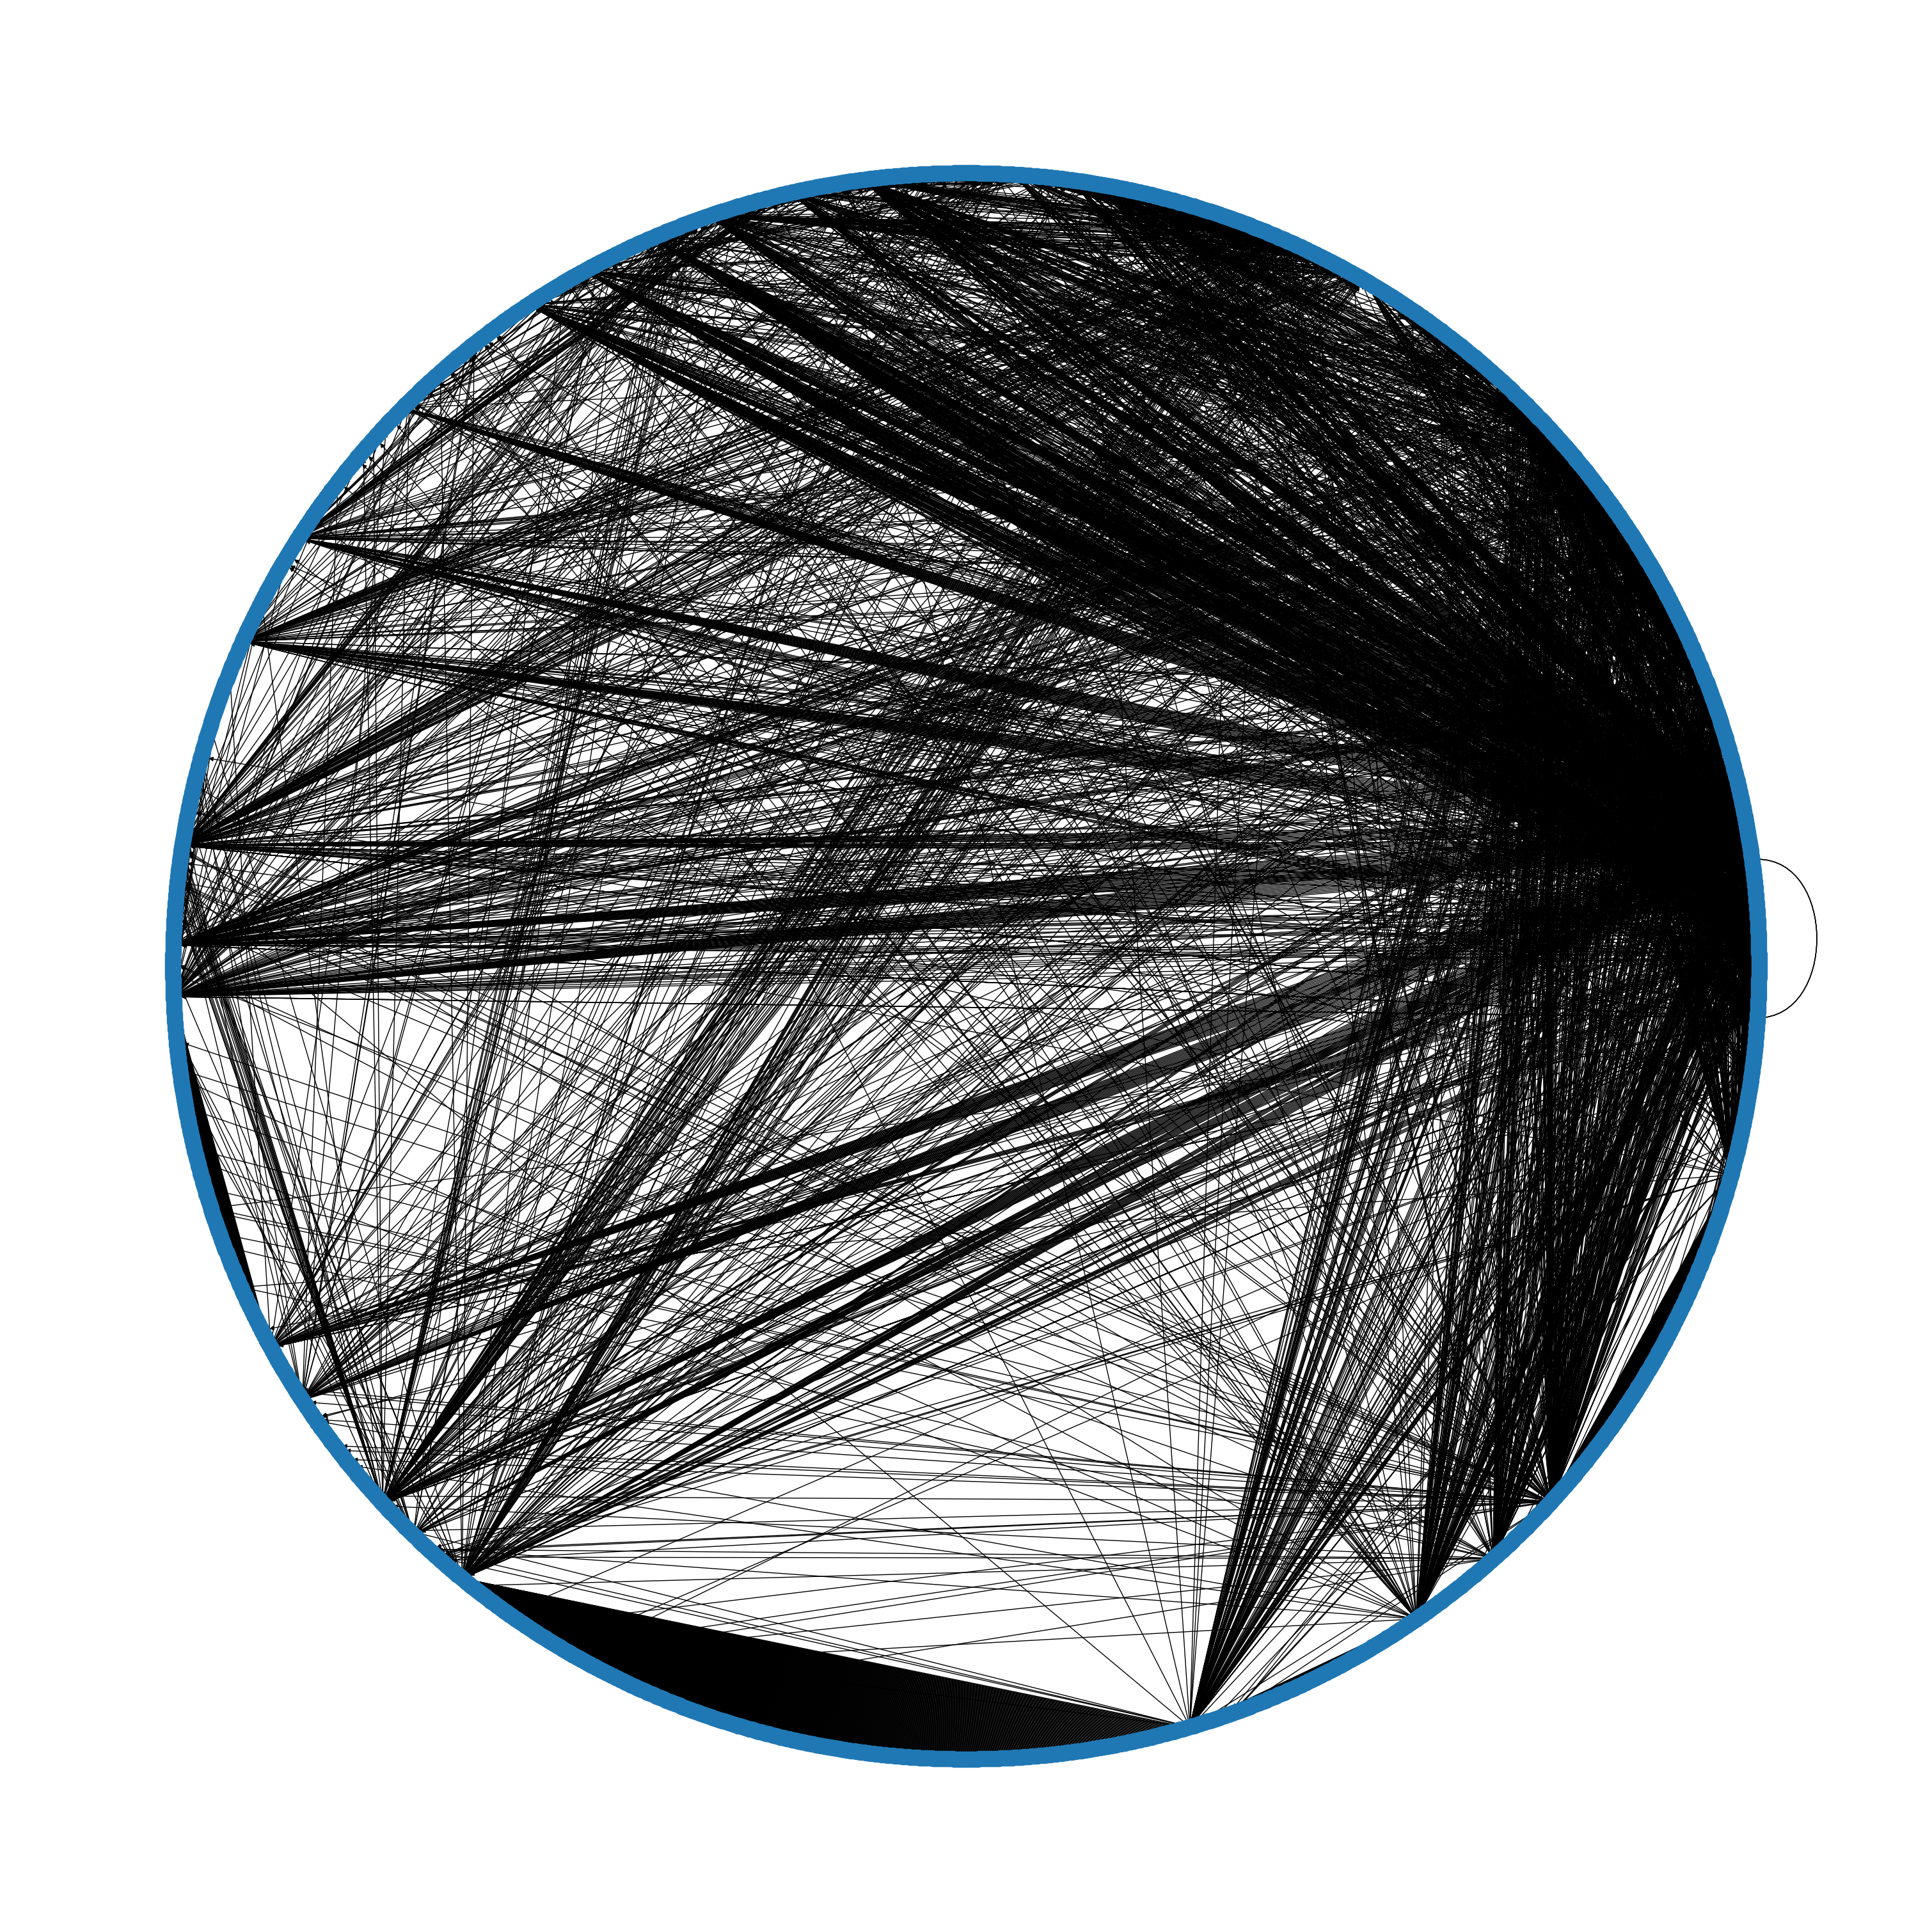

In [39]:
pos = nx.circular_layout(pygraph)

plt.figure(3, figsize=(30, 30))
nx.draw(pygraph, pos)
plt.show()

In [38]:
from pyBiodatafuse.graph import cytoscape_exporter, neo4j_exporter

neo4j_exporter.save_graph_to_neo4j_graphml(pygraph, output_path="graph_to-test.graphml")
cytoscape_exporter.load_graph_into_cytoscape(pygraph, network_name="test")

Applying default style...
Applying preferred layout
